Задание 1.2: Считайте два числа – размер матрицы. Считайте элементы этой матрицы. К ней сверху и справа присоедините куски с наибольшими значениями по столбцам и по строкам, соответственно. В незадействованный уголок вставьте 0.

In [2]:
import numpy as np

In [6]:
I = input('Введите число строк: ')
J = input('Введите число столбцов: ')
i = int(I)
j = int(J)
M = np.zeros((i, j))
Elem = input('Введите элементы матрицы: ')
Numb = Elem.split(' ')
l = h = 0
for n in Numb:
    if l<i:
        M[l][h] = int(n)
        l=l+1
    else:
        h=h+1
        l=l-i
        M[l][h] = int(n)
        l=l+1
A = M.max(axis=0)
B = M.max(axis=1)
# print(M)
# print(A)
# print(B)
Res = np.zeros((i+1, j+1))
for h in range (i+1):
    for l in range (j+1):
        if (l!=j):
            if (h==0):
                Res[h,l]=A[l]
            else:
                Res[h,l]=M[h-1,l]
        else:
            Res[h,l]=B[h-1]
Res[0,j] = 0
print(Res)

Введите число строк: 3
Введите число столбцов: 4
Введите элементы матрицы: 1 5 8 9 7 5 8 9 6 3 1 4
[[8. 9. 9. 4. 0.]
 [1. 9. 8. 3. 9.]
 [5. 7. 9. 1. 9.]
 [8. 5. 6. 4. 8.]]


Задание 2.1: Считайте функцию от символьной переменной t. Считайте два числа – пределы изменения t. Выведите график этой функции, график её производной и интеграла.

In [4]:
import sympy as sp

Введите функцию: t**2+2*t+3
Введите нижний предел: -10
Введите верхний предел: 10
f (t) = t**2 + 2*t + 3


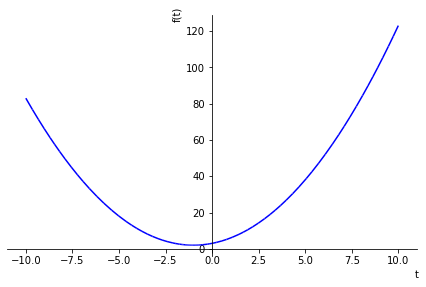

f'(t) = 2*t + 2


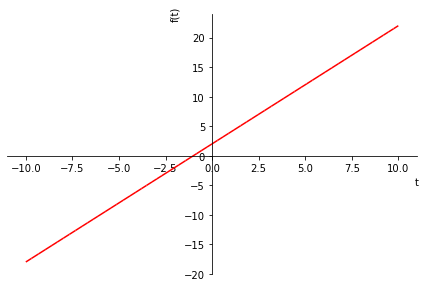

F (t) = t**3/3 + t**2 + 3*t


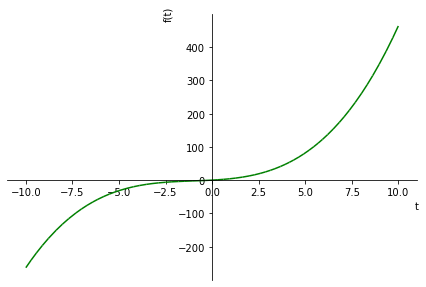

In [7]:
t=sp.Symbol('t')
Str=input('Введите функцию: ') # t**2+2*t+3
F=sp.simplify(Str)
I = input('Введите нижний предел: ')
J = input('Введите верхний предел: ')
i = int(I)
j = int(J)
print("f (t) =", F) 
sp.plotting.plot(F,(t,i,j),line_color='blue')
Df=sp.diff(F,t)
print("f'(t) =", Df)
sp.plotting.plot(sp.diff(F,t),(t,i,j),line_color='red')
If=sp.integrate(F,t)
print("F (t) =", If)
sp.plotting.plot(sp.integrate(F,t),(t,i,j),line_color='green')

Задание 2.10: Решите систему уравнений

In [8]:
x,y=sp.symbols('x,y')

A=sp.Eq(3*x**2+x*y-2*y**2,0)        # Система уравнений
B=sp.Eq(2*x**2-3*x*y+y**2,-1)
print('Решения системы: ', sp.solve([A,B],[x,y]))

Решения системы:  [(-2, -3), (2, 3), (-sqrt(6)*I/6, sqrt(6)*I/6), (sqrt(6)*I/6, -sqrt(6)*I/6)]


Задание 2.12: Решите дифференциальное уравнение Постройте график его решения для нескольких значений констант интегрирования.

Eq(y(x), (C1 + x)/(-C1 + x))


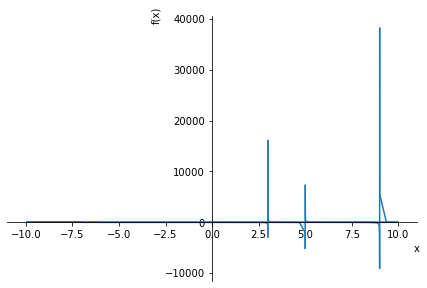

In [9]:
x=sp.symbols('x')
y=sp.symbols('y',cls=sp.Function)   # Создание неизвестной функции

Deq=sp.Eq(y(x).diff(x)*(2*x)+y(x)**2,1)

res = sp.dsolve(Deq)               # Решение дифура

print(res)

rfinres_3 = res.rhs.subs('C1', 3)
rfinres_5 = res.rhs.subs('C1', 5)
rfinres_9 = res.rhs.subs('C1', 9)

sp.plotting.plot((rfinres_3, (x, -10, 10)), (rfinres_5, (x, -10, 10)), (rfinres_9, (x, -10, 10)), linecolor = "red")

Задание 3.3: Постройте график функци f(x) = 5*cos(x)+0.25*x^2-x-1, и численно найдите корни уравнения f(x)=0.

In [10]:
import scipy.optimize as sc
import matplotlib.pyplot as plt

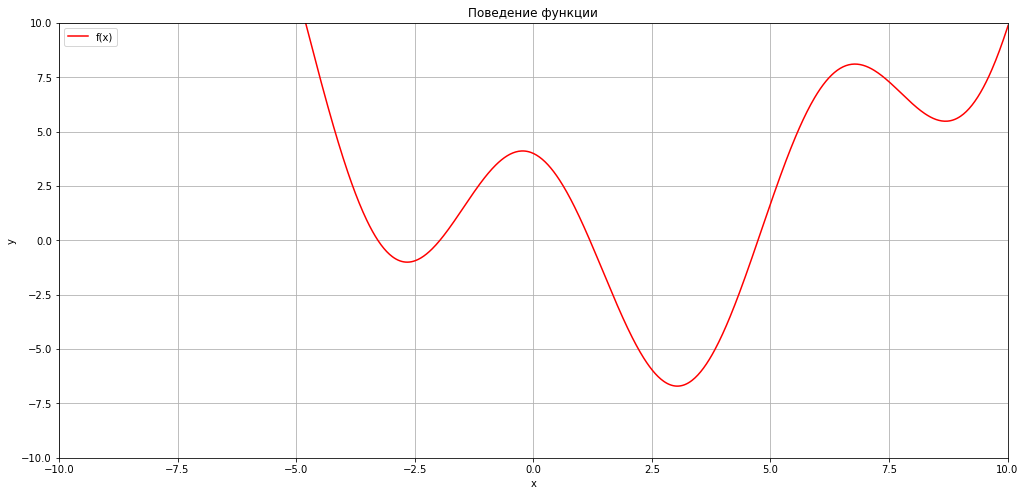

Корни уравнения: 
[-3.27474739]
[-1.96878065]
[1.19442081]
[4.73765415]


In [18]:
x=sp.Symbol('x')
F=(5*sp.cos(x)+0.25*x**2-x-1)
f=sp.lambdify(x,F)

plt.figure(figsize=(17,8))         # Косметика графика
x_Vals=np.linspace(-100,100,10000)
f_Vals=[f(x) for x in x_Vals]
plt.plot(x_Vals,f_Vals, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.title('Поведение функции')
plt.grid()
plt.legend(["f(x)"])
plt.show()

print('Корни уравнения: ')
print(sc.root(f,-3).x)
print(sc.root(f,-2).x)
print(sc.root(f,1).x)
print(sc.root(f,5).x)

Задание 3.8: Численно решите систему уравнений для различных начальных условий, и постройте фазовый портрет системы (кривые y(x)):

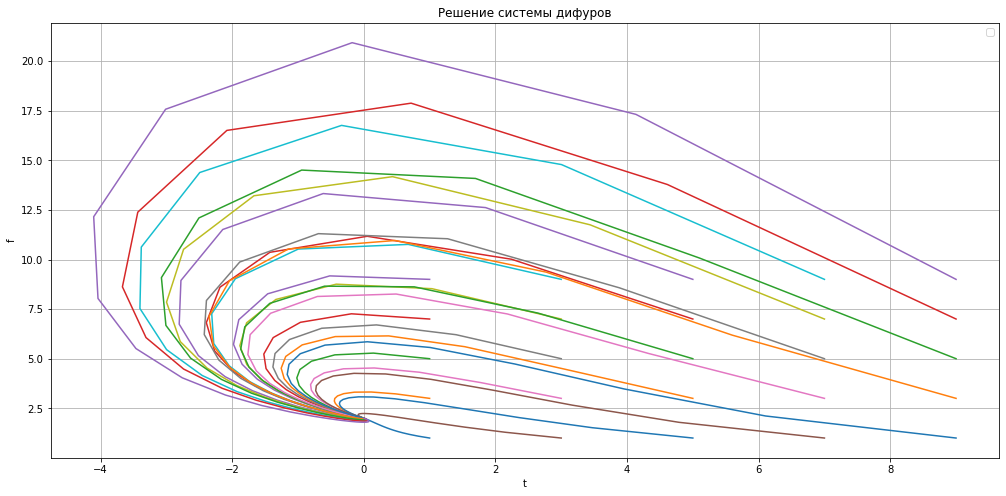

In [20]:
from scipy.integrate import odeint

def odesys(x,t):             # Система уравнений
    dx0=4-4*x[0]-2*x[1]
    dx1=x[0]*x[1]
    return [dx0,dx1]
x0=[1,2]
t=np.linspace(0,10,101)
X=odeint(odesys,x0,t)
# print(X)
plt.figure(figsize=(17,8))
plt.xlabel('t')
plt.ylabel('f')
plt.title('Решение системы дифуров')
plt.legend(["x(t)","V(t)"])
for i in np.arange(1,10,2):
    for j in np.arange(1,10,2):
        x0=[i,j]
        X=odeint(odesys,x0,t)
        plt.plot(X[:,0],X[:,1])
plt.grid()
plt.show()